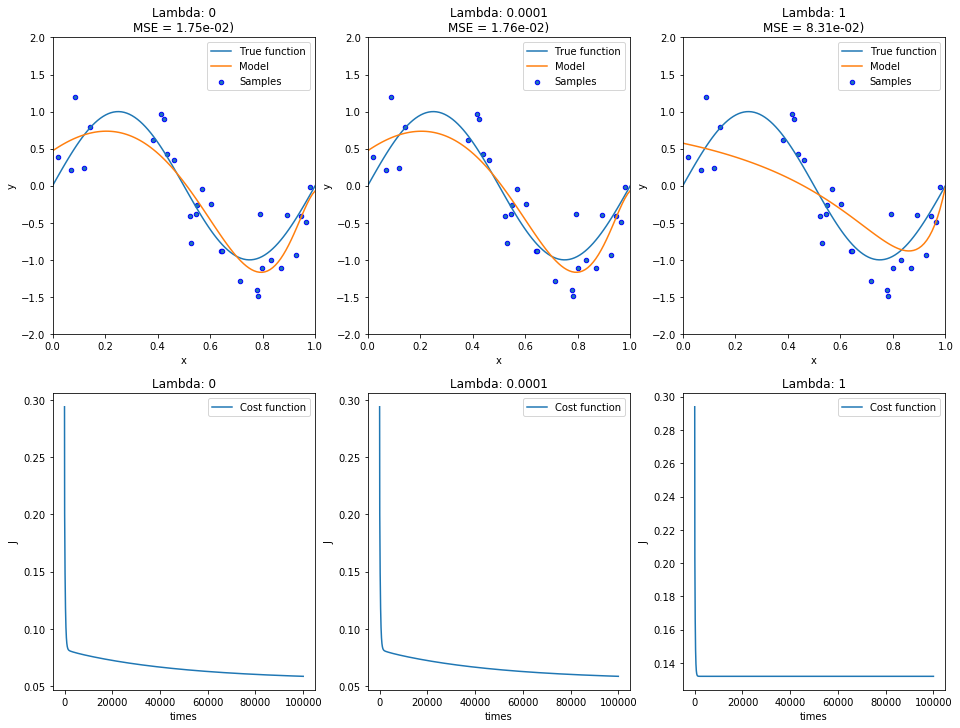

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def true_fun(X):
    return np.sin(2 * np.pi * X)

def polynomial_X(X, degree):
    _X = np.empty((X.shape[0], degree+1))
    for i in range(degree + 1):
        _X[:,i] = np.power(X,i)
    return _X

def predict(X, theta):
    y_hat = np.dot(X, theta)
    return y_hat

def compute_cost(X, y, theta, lamda):
    # number of training examples
    m = y.size
    # cost
    j = np.sum((np.dot(X, theta) - y) ** 2)
    # regularization term
    e_theta = theta ** 2
    e_theta[0] = 0
    j += lamda * np.sum(e_theta)
    # mean
    j /= (2*m)
    return j

def eval_grad(X, y, theta, lamda):
    # number of training examples
    m = y.size
    # cost
    delta = np.dot(X.T, np.dot(X, theta) - y)
    # regularization term
    e_theta = lamda * theta
    e_theta[0] = 0
    delta += e_theta
    # mean
    delta /= m
    return delta

def grad_descent(X, y, theta, lamda, alpha, num_inters):
    # number of training examples
    m = y.size
    jHistory = np.empty(num_inters)

    for i in range(num_inters):
        delta = eval_grad(X, y, theta, lamda)
        theta -= alpha * delta
        jHistory[i] = compute_cost(X, y, theta, lamda)
    
    return theta, jHistory

np.random.seed(0)

# meta-parameters
n_samples = 30                      # number of samples
degree = 15                            # polynomial degree
lambdas = [0, 1e-4, 1]          # list of regulirazation coeffectives
alpha = 0.03                           # learing rate
num_inters = 100000          # gradient loop limit

# training data
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.3

plt.figure(figsize=(16, 12))
# iterate for lambdas
for i in range(len(lambdas)):
    lamda = lambdas[i]

    # build polynomial features
    pol_X = polynomial_X(X, degree)
    theta = np.zeros(degree+1)
    # learing
    theta, jHistory = grad_descent(pol_X, y, theta, lamda, alpha, num_inters)
    # plot cost
    ax = plt.subplot(2, len(lambdas), i + 1 + len(lambdas))
    plt.setp(ax, xlabel="times", ylabel="J")
    plt.plot(range(jHistory.size), jHistory, label="Cost function")
    plt.legend(loc="best")
    plt.title("Lambda: "+str(lamda))

    # test
    X_test = np.linspace(0, 1, 100)
    y_test = true_fun(X_test)
    pol_X_test = polynomial_X(X_test, degree)
    # plot result
    ax = plt.subplot(2, len(lambdas), i + 1)
    plt.setp(ax, xlabel="x", ylabel="y")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.plot(X_test, y_test, label="True function")
    plt.plot(X_test, predict(pol_X_test, theta), label="Model")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Lambda: {}\nMSE = {:.2e})".format(
        lamda, compute_cost(pol_X_test, y_test, theta, lamda)))

plt.show()